In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests as req
import time
from citipy import citipy
import seaborn

In [24]:
api_key = "3bd17402a050e49abf48cccdc1552ec1"

In [25]:
lat = np.random.uniform(low=-90.0, high=90.0, size=500)
long = np.random.uniform(low=-180.0, high=180.0, size=500)

In [26]:
weather_df = pd.DataFrame({"Latitude": lat, "Longitude": long})
weather_df.head()

,Latitude,Longitude
0,3.415577,71.888185
1,85.501575,-121.668836
2,-13.122541,-170.951526
3,58.137694,131.422338
4,44.696329,53.659625


In [27]:
weather_df["City"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Temperature (F)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""


In [6]:

weather_df.head()

,Latitude,Longitude,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,21.440925,-69.279008,,,,,,,
1,57.554682,-43.336621,,,,,,,
2,12.238548,129.884632,,,,,,,
3,-17.622062,-90.489677,,,,,,,
4,26.297801,-40.187488,,,,,,,


In [28]:
api_key = "3bd17402a050e49abf48cccdc1552ec1"
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"
counter = 1

for index, row in weather_df.iterrows():
    try:
        latcheck = row["Latitude"]
        longcheck = row["Longitude"]
        city = citipy.nearest_city(latcheck, longcheck)
        cityname = city.city_name
        countryname = city.country_code
        
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + cityname + "," + countryname
    
        print("Checking coordinates #" + str(counter) + " for " + cityname + "," + countryname)
        print("URL: " + query_url)
        print("-----------------------------------------------------------------------------")
    
        response = req.get(query_url).json()
        
        temp = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        cloudy = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        date = response["dt"]
        newlat = response["coord"]["lat"]
        newlong = response["coord"]["lon"]
    
        weather_df.set_value(index, "City", cityname)
        weather_df.set_value(index, "Country", countryname)
        weather_df.set_value(index, "Date", date)
        weather_df.set_value(index, "Max Temperature (F)", pd.to_numeric(temp))
        weather_df.set_value(index, "Humidity (%)", humid)
        weather_df.set_value(index, "Cloudiness (%)", cloudy)
        weather_df.set_value(index, "Wind Speed (mph)", wind)
        #probably unnecessary, but replacing previous coordinates with city coordinates for accuracy
        weather_df.set_value(index, "Latitude", newlat)
        weather_df.set_value(index, "Longitude", newlong)
    except:
        print("Skipping this entry!")
    
    counter = counter + 1
    
    time.sleep(2)

Checking coordinates #1 for mahibadhoo,mv
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=mahibadhoo,mv
-----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\s

Checking coordinates #2 for tuktoyaktuk,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=tuktoyaktuk,ca
-----------------------------------------------------------------------------
Checking coordinates #3 for samusu,ws
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=samusu,ws
-----------------------------------------------------------------------------
Skipping this entry!
Checking coordinates #4 for chagda,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=chagda,ru
-----------------------------------------------------------------------------
Skipping this entry!
Checking coordinates #5 for shetpe,kz
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=shetpe,kz
-----------------------------------------------------------------------------
Checking coo

Checking coordinates #36 for faya,td
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=faya,td
-----------------------------------------------------------------------------
Skipping this entry!
Checking coordinates #37 for kenai,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=kenai,us
-----------------------------------------------------------------------------
Checking coordinates #38 for mataura,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=mataura,pf
-----------------------------------------------------------------------------
Skipping this entry!
Checking coordinates #39 for pevek,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=pevek,ru
-----------------------------------------------------------------------------
Checking coordinates #40

Checking coordinates #70 for yarada,in
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=yarada,in
-----------------------------------------------------------------------------
Checking coordinates #71 for kaeo,nz
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=kaeo,nz
-----------------------------------------------------------------------------
Checking coordinates #72 for ushuaia,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=ushuaia,ar
-----------------------------------------------------------------------------
Checking coordinates #73 for vardo,no
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=vardo,no
-----------------------------------------------------------------------------
Checking coordinates #74 for forest grove,us
URL: http://api.ope

Checking coordinates #105 for lac du bonnet,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=lac du bonnet,ca
-----------------------------------------------------------------------------
Checking coordinates #106 for chimbote,pe
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=chimbote,pe
-----------------------------------------------------------------------------
Checking coordinates #107 for chumikan,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=chumikan,ru
-----------------------------------------------------------------------------
Checking coordinates #108 for new norfolk,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=new norfolk,au
-----------------------------------------------------------------------------
Checking coordinates #10

Checking coordinates #139 for halalo,wf
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=halalo,wf
-----------------------------------------------------------------------------
Skipping this entry!
Checking coordinates #140 for norman wells,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=norman wells,ca
-----------------------------------------------------------------------------
Checking coordinates #141 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #142 for currais novos,br
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=currais novos,br
-----------------------------------------------------------------------------
Checkin

Checking coordinates #173 for narsaq,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=narsaq,gl
-----------------------------------------------------------------------------
Checking coordinates #174 for mount gambier,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=mount gambier,au
-----------------------------------------------------------------------------
Checking coordinates #175 for punta arenas,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=punta arenas,cl
-----------------------------------------------------------------------------
Checking coordinates #176 for pitimbu,br
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=pitimbu,br
-----------------------------------------------------------------------------
Checking coordinates #177 fo

Checking coordinates #207 for salta,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=salta,ar
-----------------------------------------------------------------------------
Checking coordinates #208 for mayo,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=mayo,ca
-----------------------------------------------------------------------------
Checking coordinates #209 for haines junction,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=haines junction,ca
-----------------------------------------------------------------------------
Checking coordinates #210 for manggar,id
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=manggar,id
-----------------------------------------------------------------------------
Checking coordinates #211 for hermanus,za


Checking coordinates #241 for safranbolu,tr
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=safranbolu,tr
-----------------------------------------------------------------------------
Checking coordinates #242 for talnakh,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=talnakh,ru
-----------------------------------------------------------------------------
Checking coordinates #243 for ust-omchug,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=ust-omchug,ru
-----------------------------------------------------------------------------
Checking coordinates #244 for roma,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=roma,au
-----------------------------------------------------------------------------
Checking coordinates #245 for beloha,mg
UR

Checking coordinates #275 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #276 for avarua,ck
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=avarua,ck
-----------------------------------------------------------------------------
Checking coordinates #277 for cape town,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=cape town,za
-----------------------------------------------------------------------------
Checking coordinates #278 for jamestown,sh
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=jamestown,sh
-----------------------------------------------------------------------------
Checking coordinates #279 for ca mau,vn
UR

Checking coordinates #309 for longyearbyen,sj
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=longyearbyen,sj
-----------------------------------------------------------------------------
Checking coordinates #310 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #311 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #312 for bluff,nz
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=bluff,nz
-----------------------------------------------------------------------------
Checking coordinates #313 for naryan-mar,r

Checking coordinates #344 for busselton,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=busselton,au
-----------------------------------------------------------------------------
Checking coordinates #345 for ribeira grande,pt
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=ribeira grande,pt
-----------------------------------------------------------------------------
Checking coordinates #346 for amderma,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=amderma,ru
-----------------------------------------------------------------------------
Skipping this entry!
Checking coordinates #347 for barrow,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=barrow,us
-----------------------------------------------------------------------------
Checking co

Checking coordinates #378 for chuy,uy
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=chuy,uy
-----------------------------------------------------------------------------
Checking coordinates #379 for yellowknife,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=yellowknife,ca
-----------------------------------------------------------------------------
Checking coordinates #380 for matagami,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=matagami,ca
-----------------------------------------------------------------------------
Checking coordinates #381 for puerto ayora,ec
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=puerto ayora,ec
-----------------------------------------------------------------------------
Checking coordinates #382 for yell

Skipping this entry!
Checking coordinates #412 for nanortalik,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=nanortalik,gl
-----------------------------------------------------------------------------
Checking coordinates #413 for dayong,cn
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=dayong,cn
-----------------------------------------------------------------------------
Checking coordinates #414 for hermanus,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=hermanus,za
-----------------------------------------------------------------------------
Checking coordinates #415 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates 

Checking coordinates #446 for ushuaia,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=ushuaia,ar
-----------------------------------------------------------------------------
Checking coordinates #447 for shimoda,jp
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=shimoda,jp
-----------------------------------------------------------------------------
Checking coordinates #448 for victoria,sc
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=victoria,sc
-----------------------------------------------------------------------------
Checking coordinates #449 for salinas,ec
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=salinas,ec
-----------------------------------------------------------------------------
Checking coordinates #450 for aklavik,ca
URL: 

Checking coordinates #480 for phan rang,vn
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=phan rang,vn
-----------------------------------------------------------------------------
Skipping this entry!
Checking coordinates #481 for linden,gy
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=linden,gy
-----------------------------------------------------------------------------
Checking coordinates #482 for busselton,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=busselton,au
-----------------------------------------------------------------------------
Checking coordinates #483 for mount gambier,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=3bd17402a050e49abf48cccdc1552ec1&units=imperial&q=mount gambier,au
-----------------------------------------------------------------------------
Checking 

In [10]:
weather_df.head()

,Latitude,Longitude,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Max Temperature (F)
0,21.46,-71.14,cockburn town,tc,1529371005,,100,0,11.79,81.38
1,60.14,-45.24,nanortalik,gl,1529370781,,100,88,4.07,35.21
2,11.14,123.72,sulangan,ph,1529370760,,100,32,3.4,83.99
3,-11.10,-77.61,hualmay,pe,1529371017,,87,20,4.07,62.03
4,38.52,-28.70,ribeira grande,pt,1529371021,,98,92,12.46,71.48


In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Latitude               500 non-null float64
Longitude              500 non-null float64
City                   500 non-null object
Country                500 non-null object
Date                   500 non-null object
Temperature (F)        500 non-null object
Humidity (%)           500 non-null object
Cloudiness (%)         500 non-null object
Wind Speed (mph)       500 non-null object
Max Temperature (F)    430 non-null float64
dtypes: float64(3), object(7)
memory usage: 39.1+ KB


In [13]:
weather_df.drop_duplicates(subset=["City","Country"],inplace=True)

In [14]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 499
Data columns (total 10 columns):
Latitude               231 non-null float64
Longitude              231 non-null float64
City                   231 non-null object
Country                231 non-null object
Date                   231 non-null object
Temperature (F)        231 non-null object
Humidity (%)           231 non-null object
Cloudiness (%)         231 non-null object
Wind Speed (mph)       231 non-null object
Max Temperature (F)    230 non-null float64
dtypes: float64(3), object(7)
memory usage: 19.9+ KB


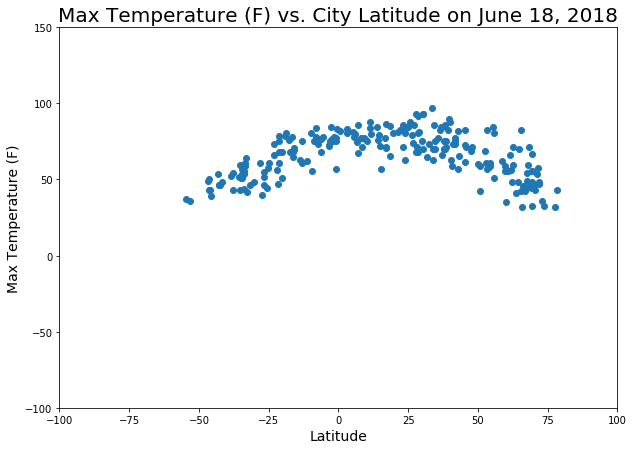

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Max Temperature (F)"]))
plt.title("Max Temperature (F) vs. City Latitude on June 18, 2018", fontsize=20)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-100, 150)
plt.xlim(-100, 100)
plt.savefig("TempvsLat.png")
plt.show()

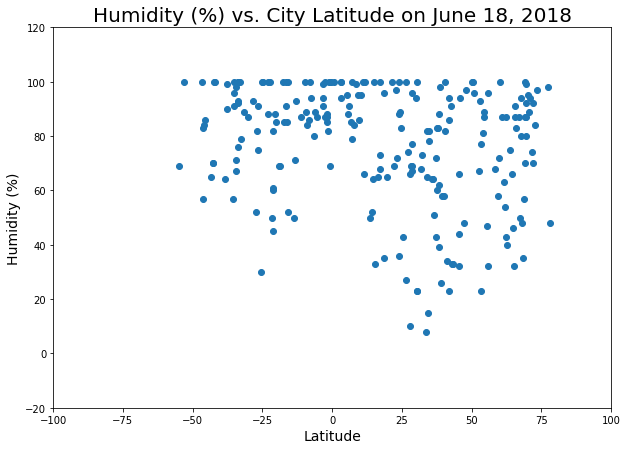

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Humidity (%)"]))
plt.title("Humidity (%) vs. City Latitude on June 18, 2018", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("HumidvsLat.png")
plt.show()

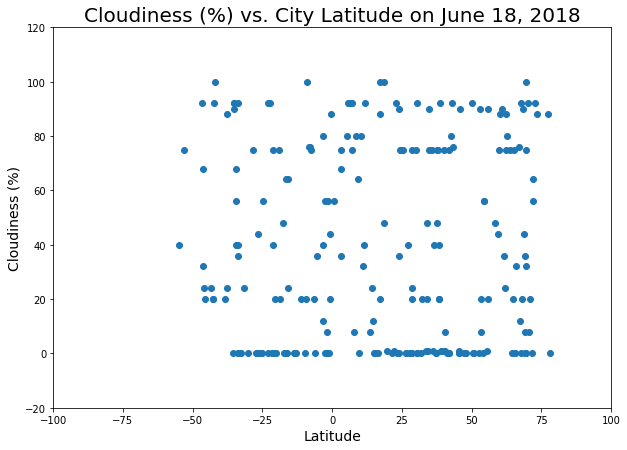

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Cloudiness (%)"]))
plt.title("Cloudiness (%) vs. City Latitude on June 18, 2018", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("CloudvsLat.png")
plt.show()

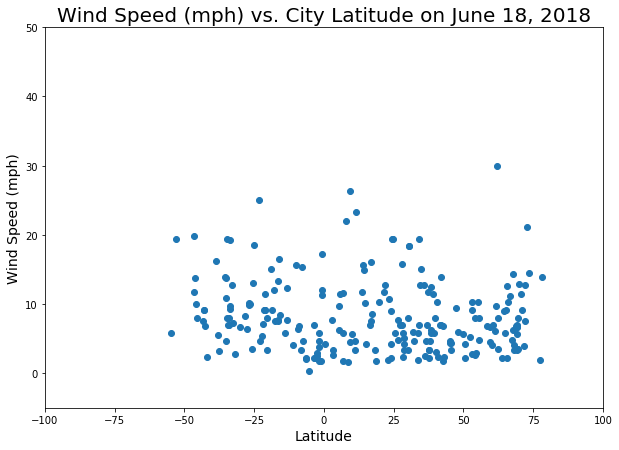

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Wind Speed (mph)"]))
plt.title("Wind Speed (mph) vs. City Latitude on June 18, 2018", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-5, 50)
plt.xlim(-100, 100)
plt.savefig("WindvsLat.png")
plt.show()

In [21]:
weather_df.to_csv("WeatherPy.csv")

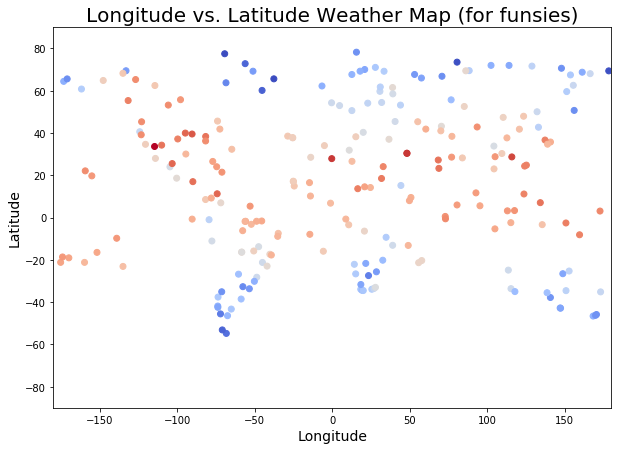

In [22]:
plt.figure(figsize=(10,7))
temperatures = pd.to_numeric(weather_df["Max Temperature (F)"])
plt.scatter(pd.to_numeric(weather_df["Longitude"]), pd.to_numeric(weather_df["Latitude"]), c=temperatures, cmap='coolwarm')
plt.title("Longitude vs. Latitude Weather Map (for funsies)", fontsize=20)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.savefig("heatmap.png")
plt.show()